In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# X,y = make_classification(n_features=1005, n_redundant=0, n_informative=500,n_clusters_per_class=1)
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
X = df.drop(['Purchased', 'User ID', 'Gender'], axis='columns')
y = df['Purchased']
print(X.shape)
X.head()

(400, 2)


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [7]:
bag = BaggingClassifier(max_features=2)

In [8]:
bag.fit(X_train,y_train)

BaggingClassifier(max_features=2)

In [9]:
plt.figure(figsize=(100,100))
plot_tree(bag.estimators_[0])
plt.show()

In [10]:
y_predited = bag.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_predited)

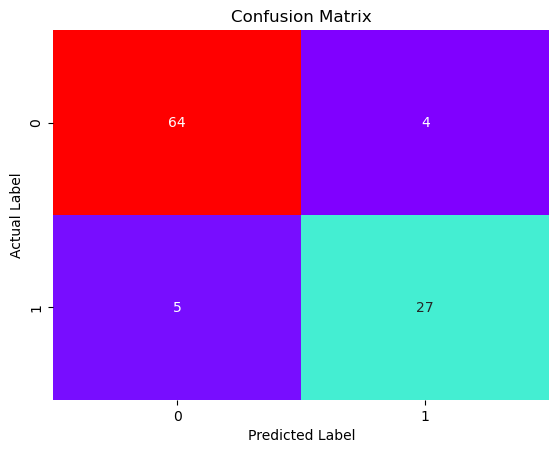

In [12]:
sns.heatmap(cm,annot=True, fmt = 'd',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [6]:
rf = RandomForestClassifier(max_features=2)

In [13]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [17]:
plt.figure(figsize=(100,100))
plot_tree(rf.estimators_[0])
plt.show()

In [14]:
y_predited = rf.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_predited)

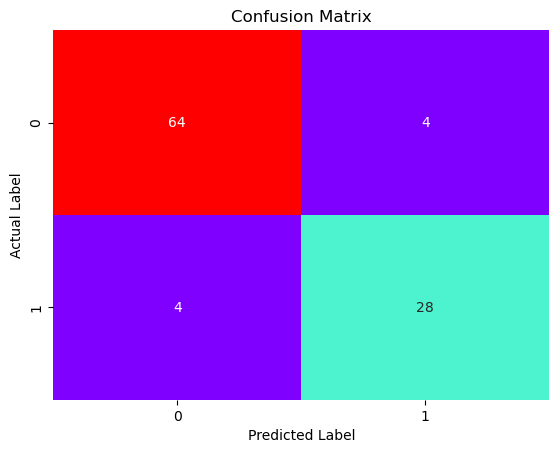

In [16]:
sns.heatmap(cm,annot=True, fmt = 'd',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()